# ExtraaLearn Project

## Context

The EdTech industry has experienced tremendous growth over the past decade. According to forecasts, the online education market was projected to reach $286.6 billion by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. Online learning has gained widespread adoption due to its accessibility, personalized learning experiences, and transparent assessment processes — making it a strong alternative to traditional education.
In the wake of the COVID-19 pandemic, the online education sector has seen even faster expansion, attracting new customers and new entrants into the market. With the availability of digital marketing channels, EdTech companies can now reach a global audience and acquire leads through multiple touchpoints, such as:

* Interactions on social media or online platforms
* Browsing the website or mobile app and downloading brochures
* Contacting the company via email for more information

These leads are then nurtured by company representatives who follow up via calls or emails to convert them into paying customers.

## Objective

ExtraaLearn is an early-stage EdTech startup offering upskilling and reskilling programs in emerging technologies. With a large volume of leads generated daily, the company faces the challenge of identifying which leads are most likely to convert into paying customers.

This project aims to:

* Build a machine learning model that predicts the likelihood of lead conversion
* Identify the key factors influencing lead conversion
* Develop actionable profiles of high-potential leads to support targeted marketing and resource allocation


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn.
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer

from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,precision_recall_curve,roc_curve,make_scorer

import warnings;
import numpy as np
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("/content/ExtraaLearn.csv")

## Data Overview

- Observations
- Sanity checks

We will take a look at the first five data entries of our data set as a sanity check

In [ ]:
df.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


We will also take a look at the last 5 entries

In [ ]:
df.tail()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
4607,EXT4608,35,Unemployed,Mobile App,Medium,15,360,2.170,Phone Activity,No,No,No,Yes,No,0
4608,EXT4609,55,Professional,Mobile App,Medium,8,2327,5.393,Email Activity,No,No,No,No,No,0
4609,EXT4610,58,Professional,Website,High,2,212,2.692,Email Activity,No,No,No,No,No,1
4610,EXT4611,57,Professional,Mobile App,Medium,1,154,3.879,Website Activity,Yes,No,No,No,No,0
4611,EXT4612,55,Professional,Website,Medium,4,2290,2.075,Phone Activity,No,No,No,No,No,0


In [ ]:
df.shape

(4612, 15)

We will want to know the name of all our features and each of their data types as this will be helpful to know going forward.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

Below we will want to know the number of unique values in each feature to check for any potential errors and to also discern which features may not be useful for data analysis

In [ ]:
df.nunique()

,0
ID,4612
age,46
current_occupation,3
first_interaction,2
profile_completed,3
website_visits,27
time_spent_on_website,1623
page_views_per_visit,2414
last_activity,3
print_media_type1,2


We can see that every person has a unique ID therefore we can drop this column since it will not be helpful in the analysis. In addition, there don't seem to be any errors in the data set as far as cateogrical variables are concerend. Meaning, we know that last_activity should only have 3 distinct values and that is confirmed above.

In [ ]:
df.drop(columns='ID',inplace=True)

As a sanity check we will check the first 5 data points to ensure that the ID column was dropped.

In [ ]:
df.head()

,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


Let's check the statistical summary of the data:

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4612.0,46.201214,13.161454,18.0,36.00000,51.000,57.00000,63.000
website_visits,4612.0,3.566782,2.829134,0.0,2.00000,3.000,5.00000,30.000
time_spent_on_website,4612.0,724.011275,743.828683,0.0,148.75000,376.000,1336.75000,2537.000
page_views_per_visit,4612.0,3.026126,1.968125,0.0,2.07775,2.792,3.75625,18.434
status,4612.0,0.298569,0.457680,0.0,0.00000,0.000,1.00000,1.000




*   Here we can see that mean of age is 46 and the median is 51
*   website_visits has some outliers on the right end as the 75th percent value is 5 and the max value is 30. We need to explore this further.
*   page_views_per_visit has some outliers on the right end as the 75th percent value is 3.75 and the max is 18





We make a list of the categorical variables below

In [ ]:
cat_col = ['current_occupation', 'first_interaction', 'profile_completed', 'last_activity', 'print_media_type1',
           'print_media_type2', 'digital_media', 'educational_channels', 'referral', 'status']



We print the count of each unique value in each column

In [ ]:
for column in cat_col:
    counts = df[column].value_counts()
    counts.name = column
    print(counts.to_string(index=True))
    print('-'*50)

current_occupation
Professional    2616
Unemployed      1441
Student          555
--------------------------------------------------
first_interaction
Website       2542
Mobile App    2070
--------------------------------------------------
profile_completed
High      2264
Medium    2241
Low        107
--------------------------------------------------
last_activity
Email Activity      2278
Phone Activity      1234
Website Activity    1100
--------------------------------------------------
print_media_type1
No     4115
Yes     497
--------------------------------------------------
print_media_type2
No     4379
Yes     233
--------------------------------------------------
digital_media
No     4085
Yes     527
--------------------------------------------------
educational_channels
No     3907
Yes     705
--------------------------------------------------
referral
No     4519
Yes      93
--------------------------------------------------
status
0    3235
1    1377
------------------------

Here we convert the data type of each cateogrical variable to cateogry. Then at the end we update prof_level to an ordinal categorical variable since it has values low, medium, high.

In [ ]:
for column in cat_col:
    df[column]=df[column].astype('category')

prof_levels = ['Low', 'Medium', 'High']
df['profile_completed'] = pd.Categorical(df['profile_completed'], categories=prof_levels, ordered=True)

As a sanity check we check the data type of each feature

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   age                    4612 non-null   int64   
 1   current_occupation     4612 non-null   category
 2   first_interaction      4612 non-null   category
 3   profile_completed      4612 non-null   category
 4   website_visits         4612 non-null   int64   
 5   time_spent_on_website  4612 non-null   int64   
 6   page_views_per_visit   4612 non-null   float64 
 7   last_activity          4612 non-null   category
 8   print_media_type1      4612 non-null   category
 9   print_media_type2      4612 non-null   category
 10  digital_media          4612 non-null   category
 11  educational_channels   4612 non-null   category
 12  referral               4612 non-null   category
 13  status                 4612 non-null   category
dtypes: category(10), float64(1), int64(3)
me

Below we make a copy of the data for further use

In [ ]:
dr = df.copy()

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status?
3. The company uses multiple modes to interact with prospects. Which way of interaction works best?
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

We will define a hist_box function that provoides both a. boxplot and histogram in the same visual, with which we can perform univariate analysis on the columns of this data set.

In [ ]:
def hist_box(data, col):
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': (0.15, 0.85)}, figsize=(12, 6))
    # Adding a graph in each part
    sns.boxplot(data=data, x=col, ax=ax_box, showmeans=True)
    sns.histplot(data=data, x=col, kde=True, ax=ax_hist)
    plt.show()

Below we plot the histogram and box plot for the varibale age:

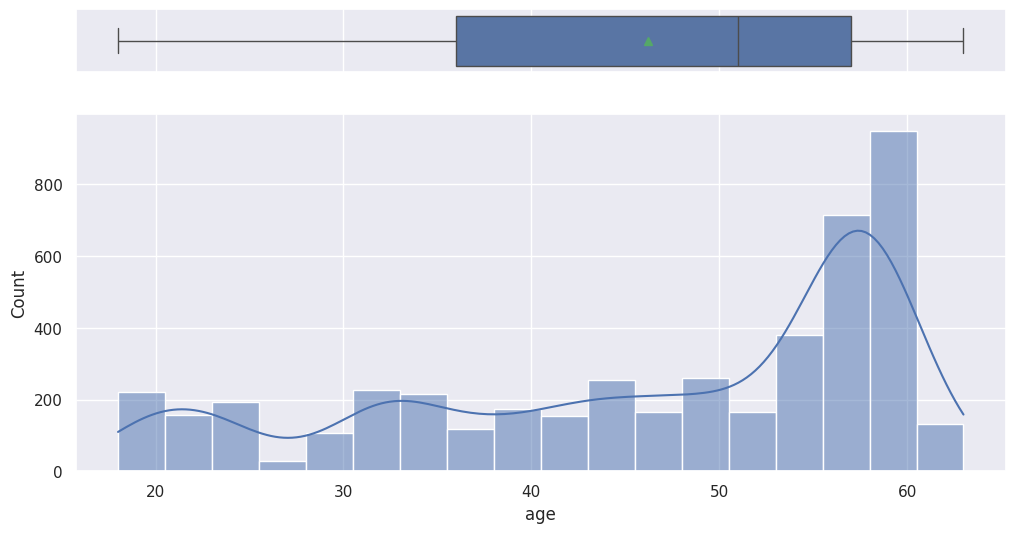

In [ ]:
hist_box(dr, "age")

The box plot above confirms that there are no outliers for the variable "age". The distribution is left skewed.

Below we plot the histogram and box plot for the variable website_visits

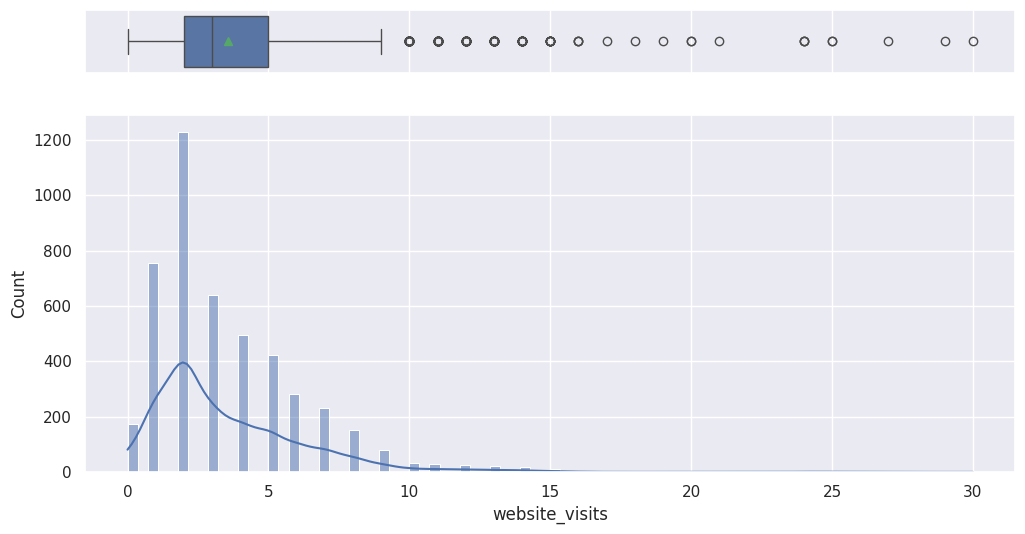

In [ ]:
hist_box(dr, "website_visits")

The distribution is right skewed. There are a few obeservations that can be considered as outliers as they are quite far from the upper whisker in the box plot. We will check how many extreme values there are.

It seems like finding the data points with website visits is a good place to start since that's where the upper whisker ends and the dsitrubtions trails off

In [ ]:
dr[dr['website_visits']>10]

,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
6,56,Professional,Mobile App,Medium,13,625,2.015,Website Activity,No,No,Yes,No,No,1
31,55,Unemployed,Website,Medium,13,1055,1.373,Email Activity,No,No,Yes,Yes,No,1
32,58,Professional,Mobile App,High,12,1151,18.434,Phone Activity,No,No,No,Yes,No,0
66,59,Unemployed,Mobile App,Medium,25,311,2.184,Phone Activity,No,No,Yes,No,No,0
201,57,Professional,Mobile App,High,14,66,2.043,Email Activity,No,No,No,Yes,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4566,59,Unemployed,Mobile App,High,13,30,3.200,Website Activity,No,No,No,Yes,No,0
4571,54,Professional,Website,High,12,1513,5.703,Email Activity,No,No,No,No,No,1
4583,49,Professional,Website,Medium,24,1039,2.064,Email Activity,Yes,No,No,No,No,1
4589,21,Student,Website,High,16,251,2.108,Phone Activity,No,No,No,No,No,0


In [ ]:
dr[dr['website_visits']>10].shape

(120, 14)

120 data points may seem like a lot for outleirs but given the size of our data set it's not much - but just to be safe we will confirm by calcualting the percentage of data points with a certain number of website visits:

In [ ]:
dr.website_visits.value_counts(normalize=True)


,proportion
website_visits,
2,0.266479
1,0.163703
3,0.138985
4,0.107112
5,0.091500
6,0.061145
7,0.050304
0,0.037728
8,0.032741


As we can see above the percentage of data points with website visits gerater than 10 is very less so we can consider these points as outliers.

Below we will plot the historgram and boxplot for the time_spent_on_website variable:

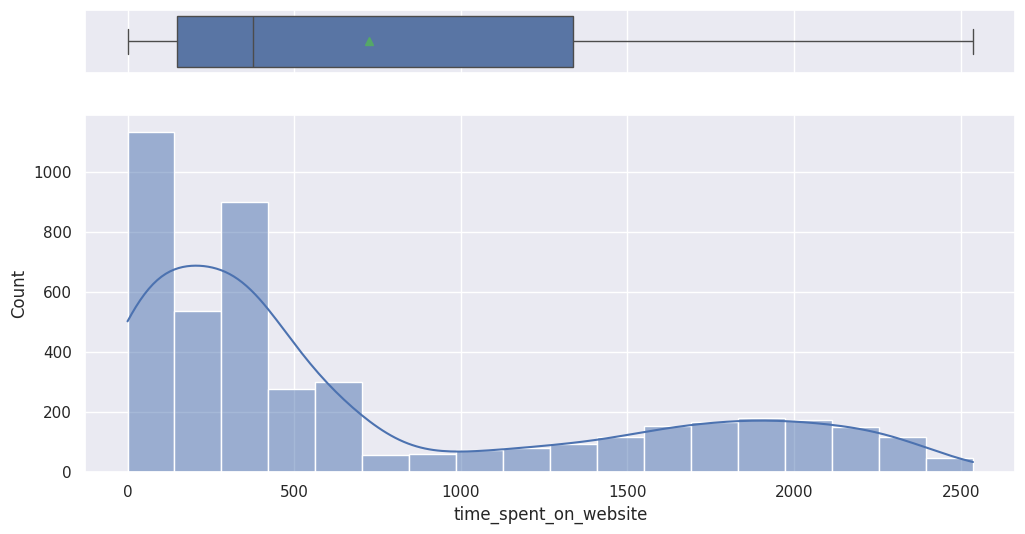

In [ ]:
hist_box(dr, "time_spent_on_website")

From above we can see that the box plot confirms there are no outliers. We can also observe that the time spent on the website for most people is less than 1000.

Below we plot the histogram and box plot for hte page views per visit variable:

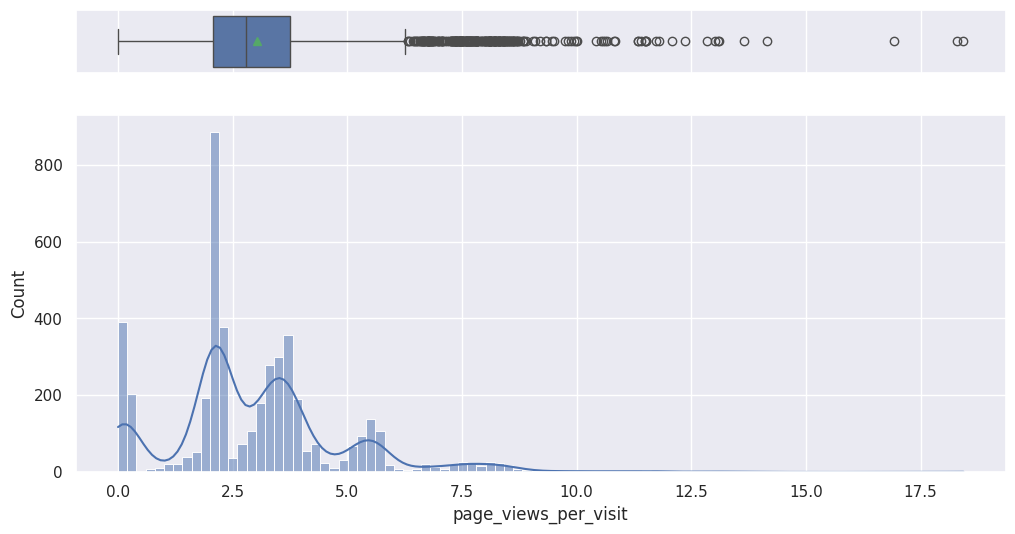

In [ ]:
hist_box(dr, "page_views_per_visit")

The box plot confirms there are many outliers. To check how many extreme values there are we will check for all data points greater than 6.25 since that's where the upper whisker ends and the dsitribution begins to trail off:

In [ ]:
dr[dr["page_views_per_visit"]>6.25]

,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
4,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0
32,58,Professional,Mobile App,High,12,1151,18.434,Phone Activity,No,No,No,Yes,No,0
47,35,Professional,Mobile App,Medium,2,497,7.050,Email Activity,No,No,No,No,No,0
110,31,Professional,Website,High,1,187,7.364,Email Activity,No,No,No,Yes,No,1
121,56,Professional,Mobile App,Medium,2,561,6.887,Email Activity,No,No,No,No,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4470,40,Unemployed,Mobile App,High,2,1747,6.810,Email Activity,No,No,No,No,Yes,0
4507,33,Professional,Mobile App,High,5,83,6.822,Email Activity,No,No,No,No,No,0
4514,42,Professional,Mobile App,Medium,2,762,7.997,Phone Activity,No,No,No,No,No,0
4572,55,Unemployed,Mobile App,High,1,617,7.397,Phone Activity,No,No,No,No,No,0


In [ ]:
dr[dr["page_views_per_visit"]>6.25].shape

(260, 14)

We will now remove the outliers below:

In [ ]:
# Dropping observaions with webstie visits greater than 10. There are 120 such observations
dr.drop(index=dr[dr.website_visits>10].index,inplace=True)

# Dropping observation with page views per visit greater than 6.25. There are just 260 such observations
dr.drop(index=dr[(dr.page_views_per_visit>6.25)].index,inplace=True)

Let's now understand the dsitribution of the categorical variables starting with current occupation:

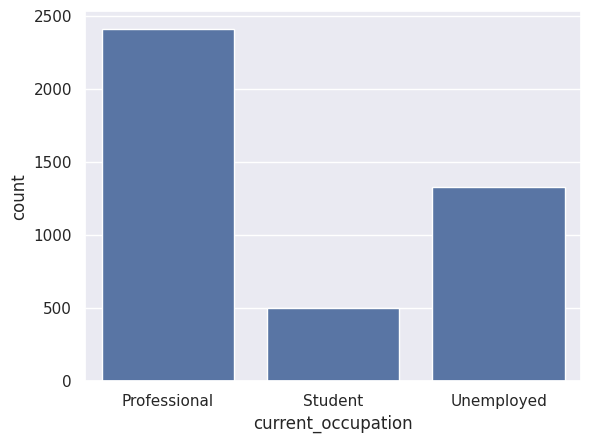

In [ ]:
sns.countplot(x = dr['current_occupation'])
plt.show()

In [ ]:
dr['current_occupation'].value_counts(normalize=True)

,proportion
current_occupation,
Professional,0.568664
Unemployed,0.314063
Student,0.117272


From above we can see that more than half of the people in our data are professionals and only a small percentage are students. It makes sense given the fact that some professional take online courses to help them progress in their current job or if they're trying to pivot. Students that are already at a university are less inclined to sign up for additional online classes if they're already enrolled in a university. The high percetnage in unemployed is understandable for those who are trying to learn enough to apply for a job

Here is the dsitribution for the first interaction:

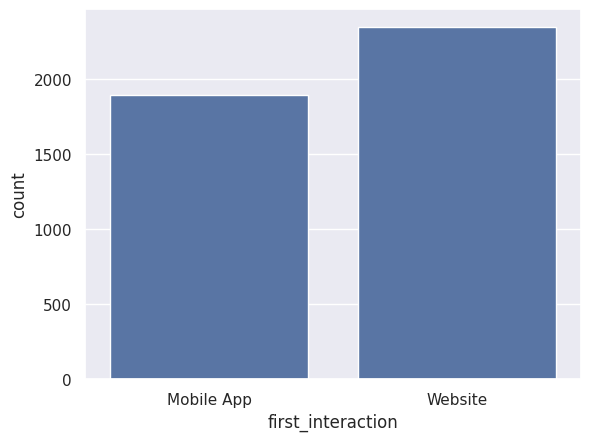

In [ ]:
sns.countplot(x = dr['first_interaction'])
plt.show()

In [ ]:
dr['first_interaction'].value_counts(normalize=True)

,proportion
first_interaction,
Website,0.553563
Mobile App,0.446437


Here we can see that the data is split pretty evenly between mobile app and website first interactions.

Below is the bar graph for the profile completed variable:

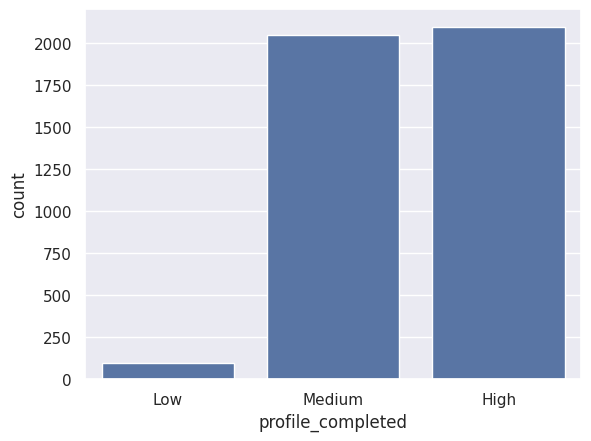

In [ ]:
sns.countplot(x = dr['profile_completed'])
plt.show()

In [ ]:
dr['profile_completed'].value_counts(normalize=True)

,proportion
profile_completed,
High,0.494337
Medium,0.482775
Low,0.022888


From above we can see that almost everyone has a medium to highly completed profile.

Below is the bar grpah for the last activity variable.

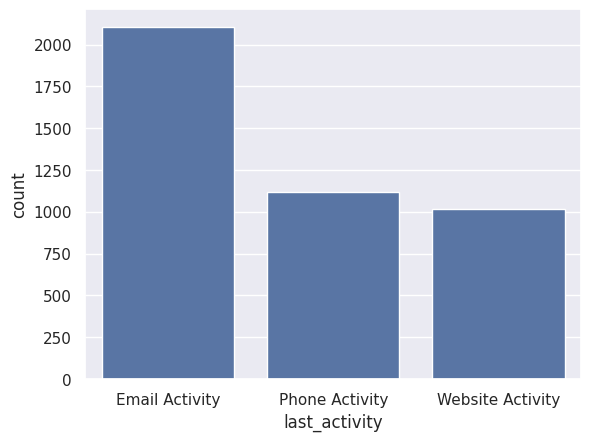

In [ ]:
sns.countplot(x = dr['last_activity'])
plt.show()

In [ ]:
dr['last_activity'].value_counts(normalize=True)

,proportion
last_activity,
Email Activity,0.496933
Phone Activity,0.263568
Website Activity,0.239500


Email activity seems to be the dominant last interaction with phone and website acticity matching in effectivty.

Below is the bar pgrah for print_media_type1 variable

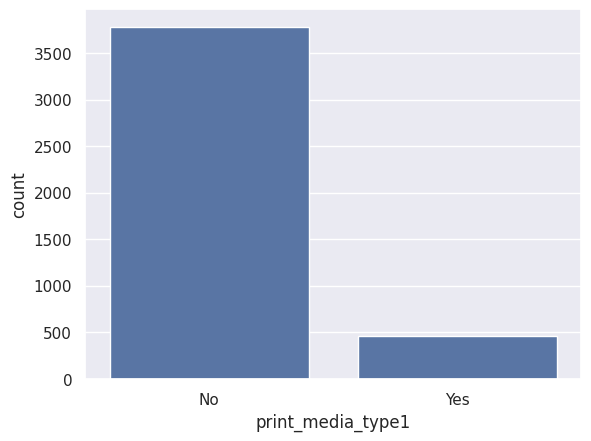

In [ ]:
sns.countplot(x = dr['print_media_type1'])
plt.show()

In [ ]:
dr['print_media_type1'].value_counts(normalize=True)

,proportion
print_media_type1,
No,0.891694
Yes,0.108306


So 90% of the people did not see ExtraaLearn's ad in the newspaper. This may not be surprising as newspapers are nowadays a less popular method of advertisment.

Below is the bar graph for printe media type 2:

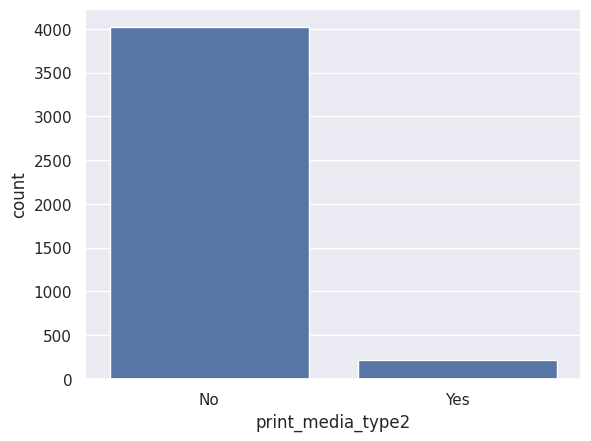

In [ ]:
sns.countplot(x = dr['print_media_type2'])
plt.show()

In [ ]:
 dr['print_media_type2'].value_counts(normalize=True)

,proportion
print_media_type2,
No,0.949033
Yes,0.050967


So 95% of the people have not seen their ad in the magazine - again not surprising.

Below is the bar graph for digital media:

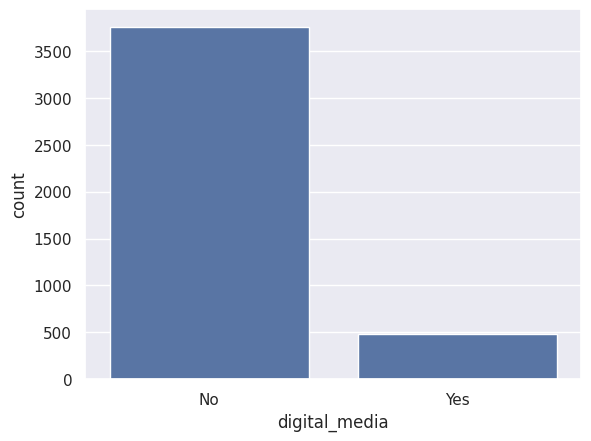

In [ ]:
sns.countplot(x = dr['digital_media'])
plt.show()

In [ ]:
 dr['digital_media'].value_counts(normalize=True)

,proportion
digital_media,
No,0.887447
Yes,0.112553


Below is the bar graph for educaitonal channels:

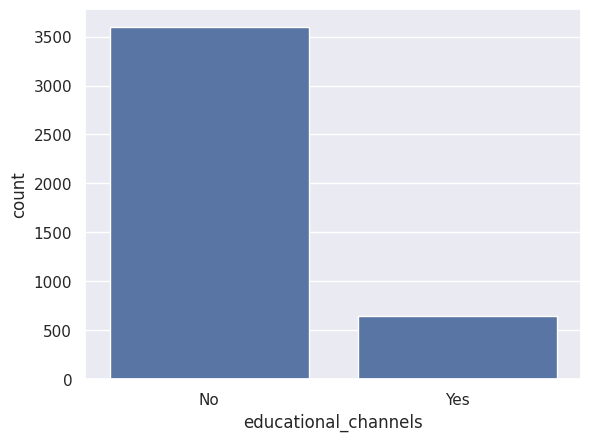

In [ ]:
sns.countplot(x = dr['educational_channels'])
plt.show()

In [ ]:
 dr['educational_channels'].value_counts(normalize=True)

,proportion
educational_channels,
No,0.849221
Yes,0.150779


Below is the bar graph for teh referral variable:

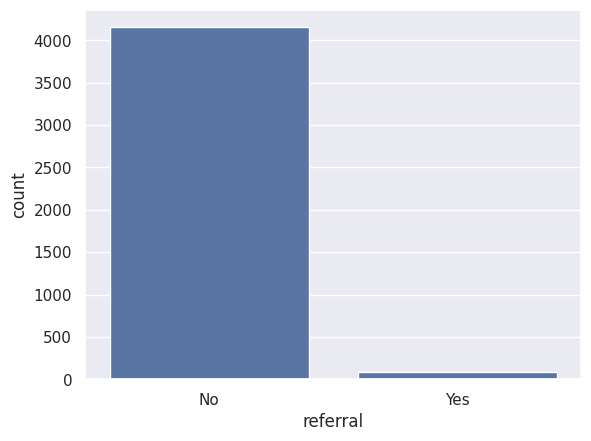

In [ ]:
sns.countplot(x = dr['referral'])
plt.show()

In [ ]:
 dr['referral'].value_counts(normalize=True)

,proportion
referral,
No,0.980179
Yes,0.019821


This is very important to know, almost everyone had not heard of ExtraaLearn through reference.

Below is the bar graph for the status variable:

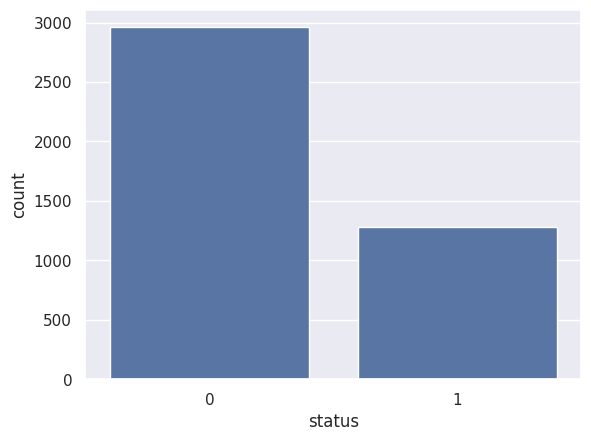

In [ ]:
sns.countplot(x = dr['status'])
plt.show()

In [ ]:
 dr['status'].value_counts(normalize=True)

,proportion
status,
0,0.698679
1,0.301321


From above we can see that roughly only 30% of people were converted to a paid customer.

Now it is time for some Bivariate Analysis. We will find and visualize the correlation matrix using a heat map:

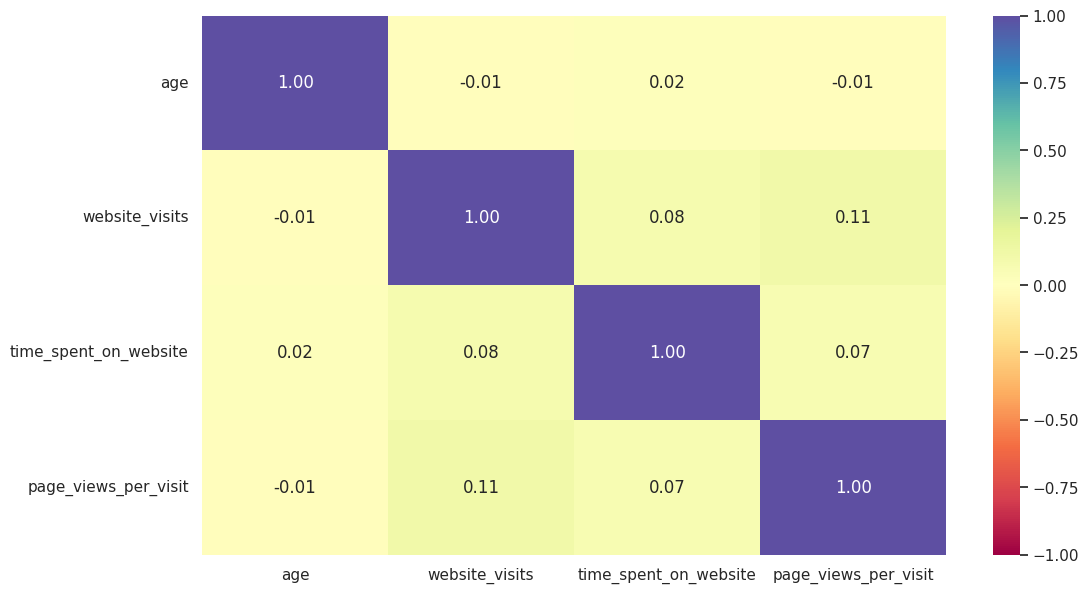

In [ ]:
cols_list = dr.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(dr[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

From above we can gather a few observations: "website visits" and "page views per visit" are positively correlated and so are "website visits" and "time spent on website". "Time spent on website" and "page views per visit" are also positively correlated. Every other pair of continous variables don't seem to be corerlated with one another.

Below we will define a stacked barplot function to help analyze how the target variable varies across precitor categories.

In [ ]:
# Defining the stacked_barplot() function
def stacked_barplot(data,predictor,target,figsize=(10,6)):
  (pd.crosstab(data[predictor],data[target],normalize='index')*100).plot(kind='bar',figsize=figsize,stacked=True)
  plt.legend(loc="lower right")
  plt.ylabel(target)

Below we plot the stacked barplot for the variable "current occupation" against the target varibale "status"

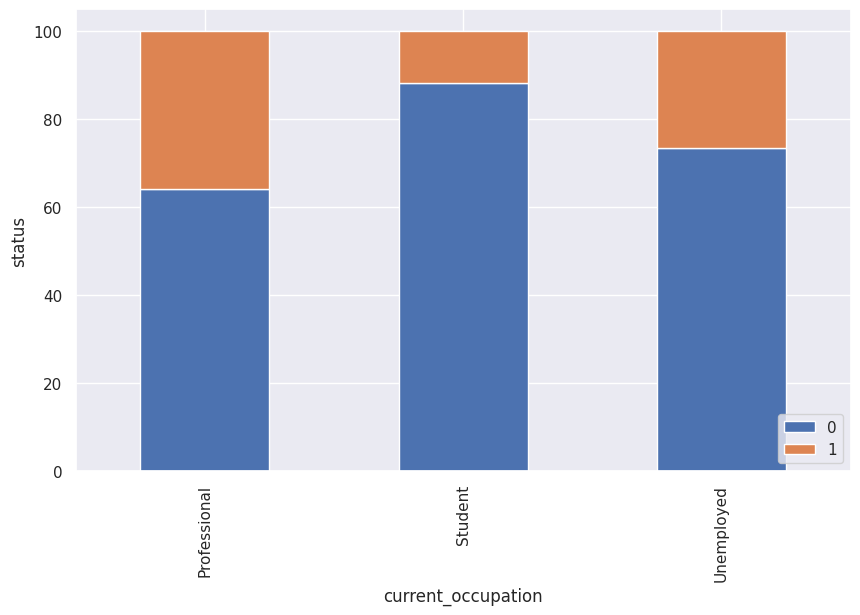

In [ ]:
stacked_barplot(dr, "current_occupation", "status" )

From the above we can see the conversion rate for professionals is higher than the other two. Then unemployed then stufent - which shouldn't be surprising given our previous insights

Below we plot the stacked barplot for the variable "first interaction" against the target variable "status"

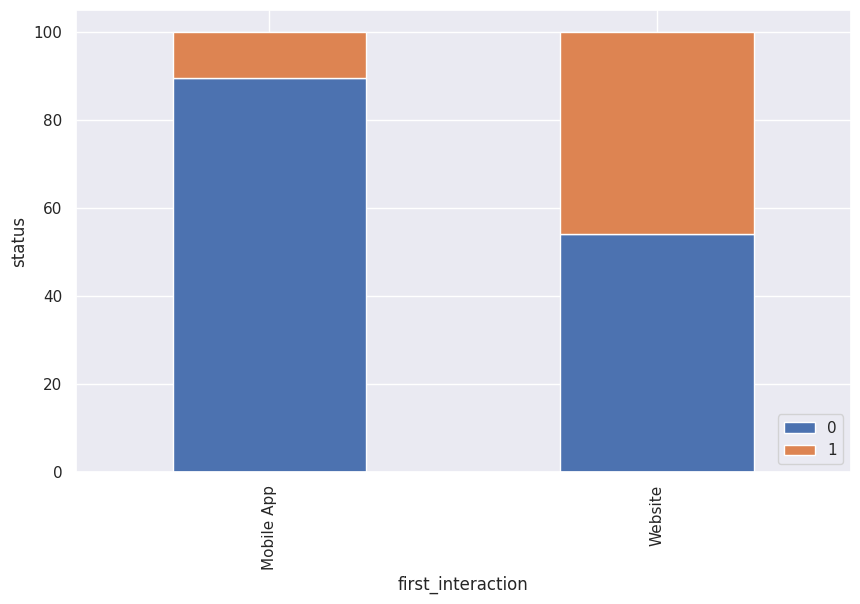

In [ ]:
stacked_barplot(dr, "first_interaction", "status")

Here we can see the conversion rate for website as a first interaction is higher.

Below we plot the stacked barplot for the variable "last_activity" against the target variable "status"

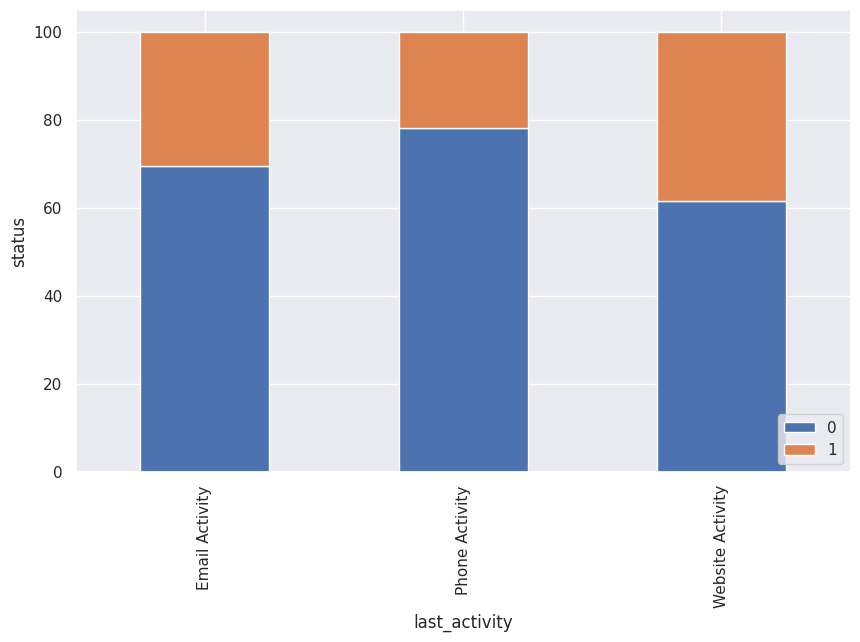

In [ ]:
stacked_barplot(dr, "last_activity", "status")

Here we can see the converstion rate for website activity was greatest followed by email activity followed by phone activity.

Below we plot hte stacked barplot for the variable "print_media_type1" against the target variable "status"

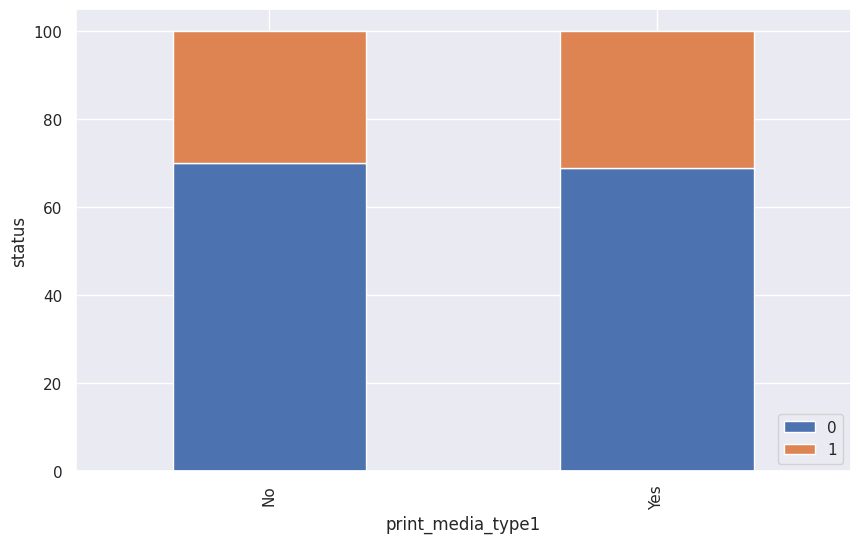

In [ ]:
stacked_barplot(dr, "print_media_type1", "status")

The conversion rate for both is roughly the same perhaps indiating that this isn't the best method for advertisment.

Below we plot the stacked barplot for the variable "print_media_type2" against the target varibale "status"

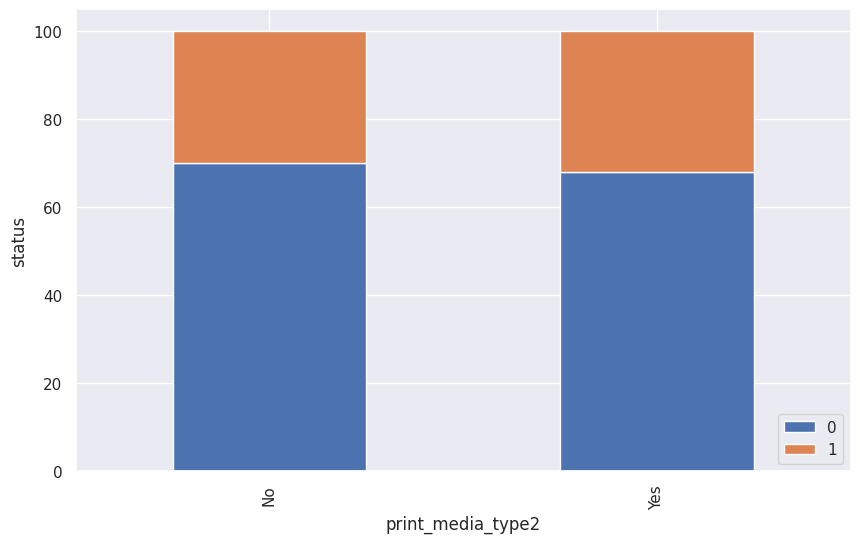

In [ ]:
stacked_barplot(dr, "print_media_type2", "status")

As we can see the conversion rate is roughly the same so again magazine may not be the best method of advertisement.

Below we plot the stacked bar plot for the variable "digital media" against the target variable "status"

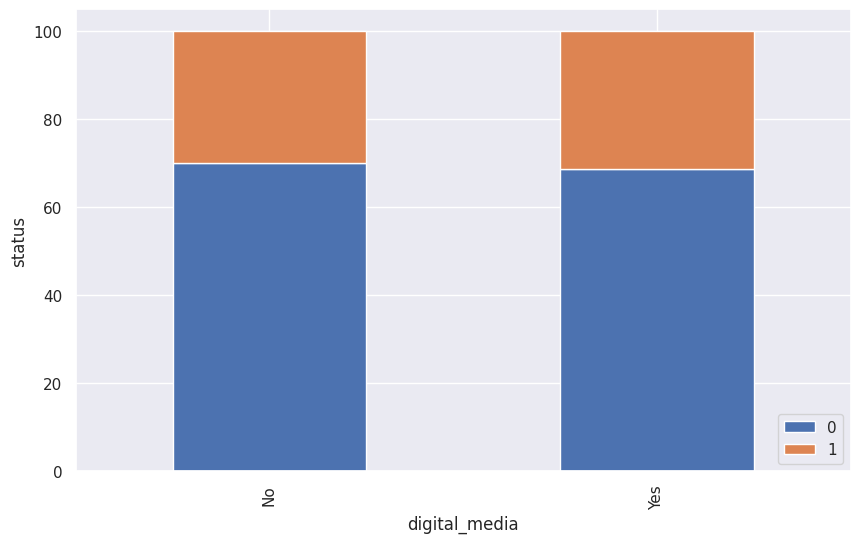

In [ ]:
stacked_barplot(dr, "digital_media", "status")

The conversion rate appears to be nearly the same.

Below we plot the stacked barplot for the variable "educational channels" against the target variable "status"

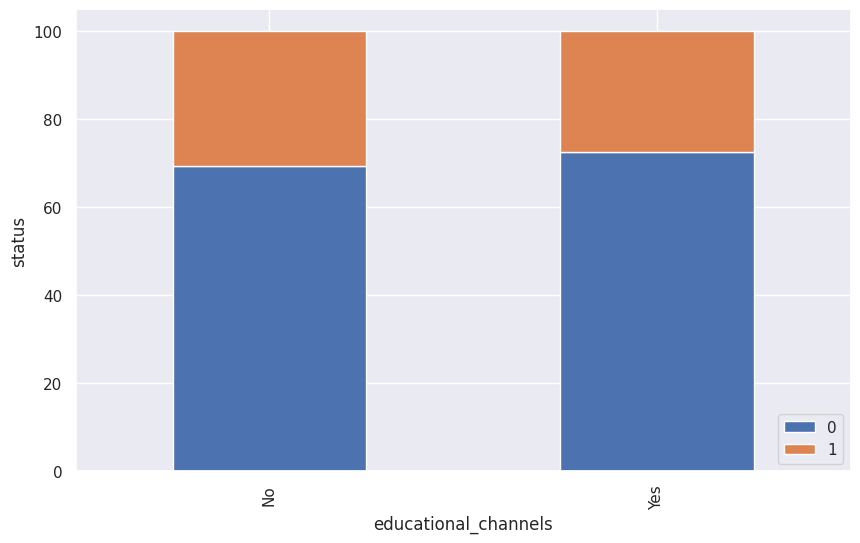

In [ ]:
stacked_barplot(dr, "educational_channels", "status")

conversion rate is roughly the same.

Below we plot the stacked barplot for the variable "referral" against the target variable "status"

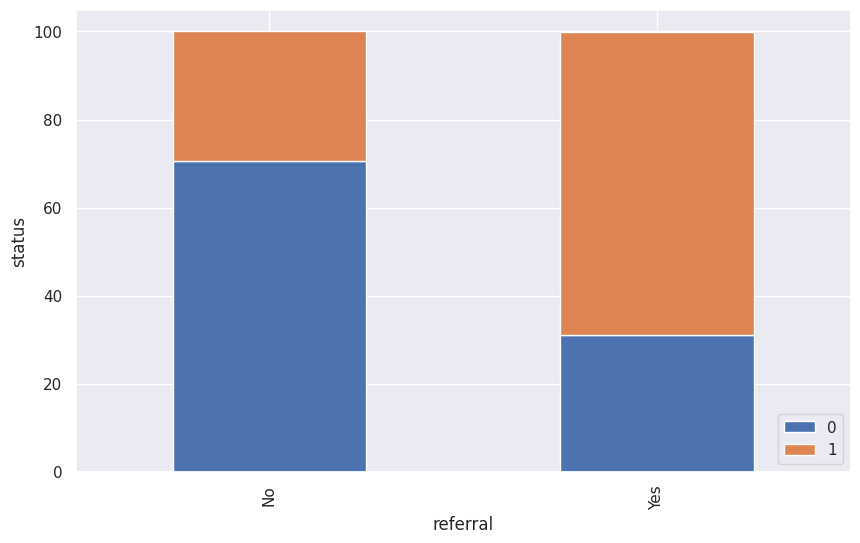

In [ ]:
stacked_barplot(dr, "referral", "status")

Here we can see the conversion rate for those who received a referral were higher but keep in mind that very few people received a referral.

Below we plot the stacked barplot for the variable "profile_completed" against the target varibale "status"

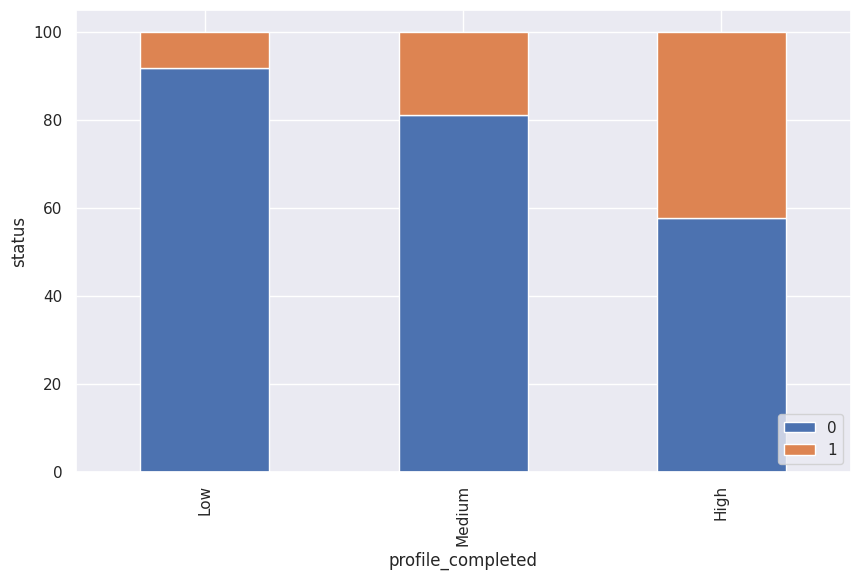

In [ ]:
stacked_barplot(dr, "profile_completed", "status")

Here we can see that conversion rate is higher when more fo the profile is completed indicating a "postive correlation" so to speak.

Below we separate the independent variables X and the dependent variable Y which would be status:

In [ ]:
X=dr.drop(columns='status')
Y=dr['status']

Below we split the data into 70% train and 30% test sets:

In [ ]:
# Splitting the data into train and test sets
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=1,stratify=Y)

We already know that there are no misisng values but as a sanity check we will do once more:

In [ ]:
print(X_train.isna().sum())
print('-'*30)
print(X_test.isna().sum())

age                      0
current_occupation       0
first_interaction        0
profile_completed        0
website_visits           0
time_spent_on_website    0
page_views_per_visit     0
last_activity            0
print_media_type1        0
print_media_type2        0
digital_media            0
educational_channels     0
referral                 0
dtype: int64
------------------------------
age                      0
current_occupation       0
first_interaction        0
profile_completed        0
website_visits           0
time_spent_on_website    0
page_views_per_visit     0
last_activity            0
print_media_type1        0
print_media_type2        0
digital_media            0
educational_channels     0
referral                 0
dtype: int64


Below we convert any non-cateogrical variables to all floats.

In [ ]:
#converting data types of columns to float
for column in ['age', 'website_visits', 'time_spent_on_website']:
    X_train[column]=X_train[column].astype('float')
    X_test[column]=X_test[column].astype('float')

Belowe we create make a list of dummy variables in order to encode the categorical variables (that are non ordinal)

In [ ]:
#List of columns to create a dummy variables
col_dummy=['current_occupation', 'first_interaction', 'last_activity', 'print_media_type1', 'print_media_type2', 'digital_media', 'educational_channels', 'referral']

In [ ]:
#Encoding categorical varaibles
X_train=pd.get_dummies(X_train, columns=col_dummy, drop_first=True)
X_test=pd.get_dummies(X_test, columns=col_dummy, drop_first=True)

Below we encode the orindal categorical variable "profile_completed"

In [ ]:
#Encoding ordinal categorical variable profile completed

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

X_train['profile_completed'] = le.fit_transform(X_train['profile_completed'])
X_test['profile_completed'] = le.transform(X_test['profile_completed'])

The model can obviously make wrong predictions but we are more concerned with false negatives - predicting a lead will not convert but he indeed would means a loss of opportunity and loss of income for ExtraaLearn

So we want Recall to be maximized, the greater the recall the lesser the chances of false negatives.

We will build 4 models: logistic regression, support vector machine, decision tree, and random forest.

Let us also design a function to calculate and print the classification report and confusion matrix so that we don't have to rewrite the same code repeatedly for each model:

In [ ]:
# Creating metric function
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))

    sns.heatmap(cm, annot=True,  fmt='.2f')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

Below we build our logisitc regression model:

In [ ]:
# Fitting logistic regression model
lg = LogisticRegression()
lg.fit(X_train,y_train)

LogisticRegression()

Below we check the performance on the training data:

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      2072
           1       0.74      0.59      0.66       894

    accuracy                           0.81      2966
   macro avg       0.79      0.75      0.77      2966
weighted avg       0.81      0.81      0.81      2966



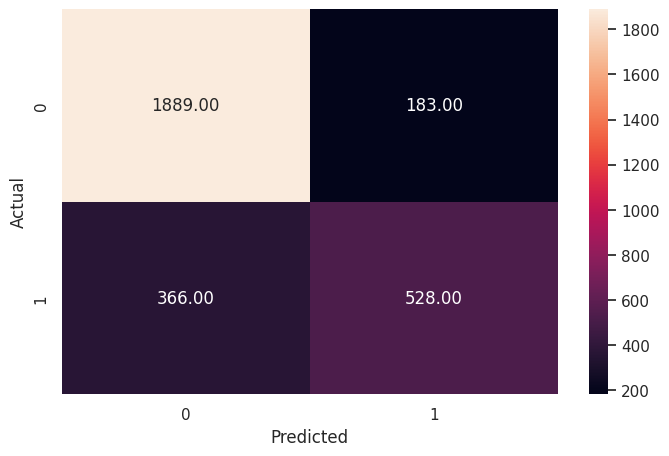

In [ ]:
# Checking the performance on the training data
y_pred_train = lg.predict(X_train)
metrics_score(y_train, y_pred_train)

From above we can determine that we have a recall score of 59%

Below we check the performance on the test dataset.

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       889
           1       0.74      0.61      0.66       383

    accuracy                           0.82      1272
   macro avg       0.79      0.76      0.77      1272
weighted avg       0.81      0.82      0.81      1272



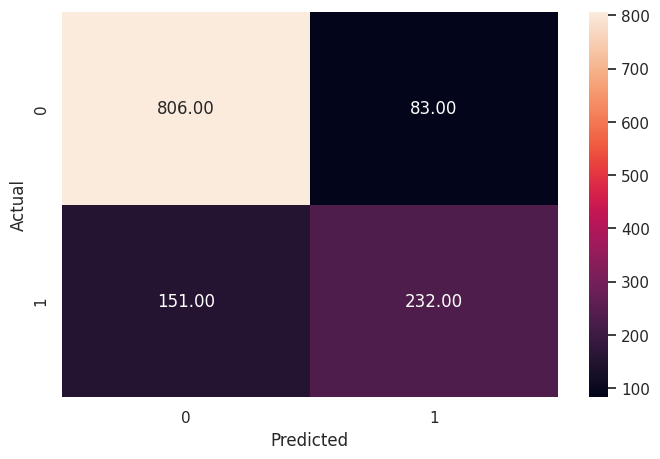

In [ ]:
# Checking the performance on the test dataset
y_pred_test = lg.predict(X_test)
metrics_score(y_test, y_pred_test)

Below we find the optimal threshold for the model using the precision-recall curve

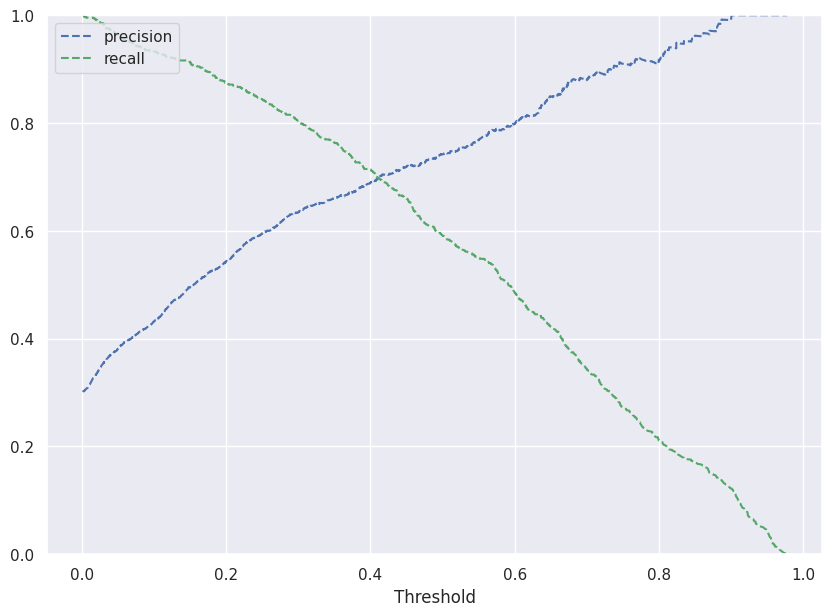

In [ ]:
# Predict_proba gives the probability of each observation belonging to each class
y_scores_lg=lg.predict_proba(X_train)

precisions_lg, recalls_lg, thresholds_lg = precision_recall_curve(y_train, y_scores_lg[:,1])

# Plot values of precisions, recalls, and thresholds
plt.figure(figsize=(10,7))
plt.plot(thresholds_lg, precisions_lg[:-1], 'b--', label='precision')
plt.plot(thresholds_lg, recalls_lg[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

From the grpah above we can determine that more optimal threshold is 0.38

In [ ]:
# Setting the optimal threshold
optimal_threshold = 0.38

Below we check the performance of the model on the training and test data using the optimal threshold:

              precision    recall  f1-score   support

           0       0.88      0.85      0.86      2072
           1       0.68      0.73      0.70       894

    accuracy                           0.81      2966
   macro avg       0.78      0.79      0.78      2966
weighted avg       0.82      0.81      0.81      2966



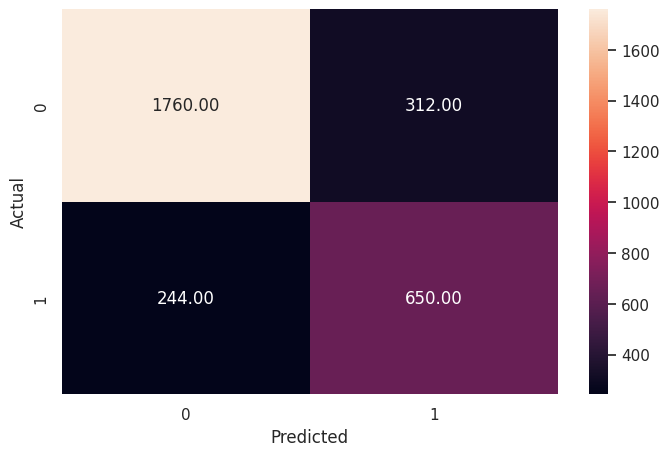

In [ ]:
# creating confusion matrix
y_pred_train = lg.predict_proba(X_train)
metrics_score(y_train, y_pred_train[:,1]>optimal_threshold)

              precision    recall  f1-score   support

           0       0.88      0.85      0.87       889
           1       0.68      0.73      0.71       383

    accuracy                           0.82      1272
   macro avg       0.78      0.79      0.79      1272
weighted avg       0.82      0.82      0.82      1272



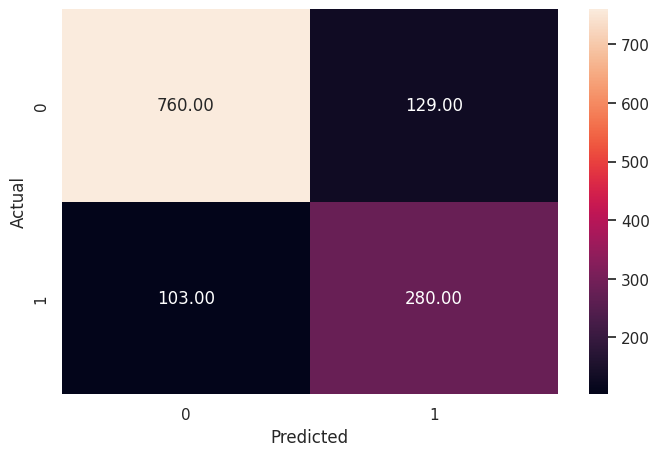

In [ ]:
y_pred_test = lg.predict_proba(X_test)
metrics_score(y_test, y_pred_test[:,1]>optimal_threshold)

In both cases the recall improved singificantly but the model perofrmance isn't exactly great so we will build another model.

We will now build our SVM model below. To accelerate SVM training, let's scale the data for SVM.

In [ ]:
scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train)
X_train_scaled = scaling.transform(X_train)
X_test_scaled = scaling.transform(X_test)

We will build the model using two widely used kernel functions: linear and RBF kernel.

Below is with the linear kernel:

In [ ]:
svm = SVC(kernel='linear',probability=True) # Linear kernal or linear decision boundary
model = svm.fit(X= X_train_scaled, y = y_train)

We check the performance on the train and test data:

              precision    recall  f1-score   support

           0       0.87      0.90      0.88      2072
           1       0.74      0.68      0.71       894

    accuracy                           0.83      2966
   macro avg       0.80      0.79      0.80      2966
weighted avg       0.83      0.83      0.83      2966



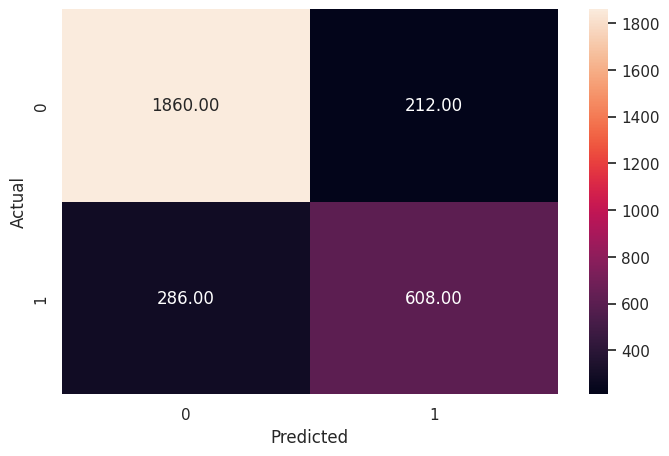

In [ ]:
y_pred_train_svm = model.predict(X_train_scaled)
metrics_score(y_train, y_pred_train_svm)

Testing performance:
              precision    recall  f1-score   support

           0       0.86      0.89      0.87       889
           1       0.72      0.68      0.70       383

    accuracy                           0.82      1272
   macro avg       0.79      0.78      0.79      1272
weighted avg       0.82      0.82      0.82      1272



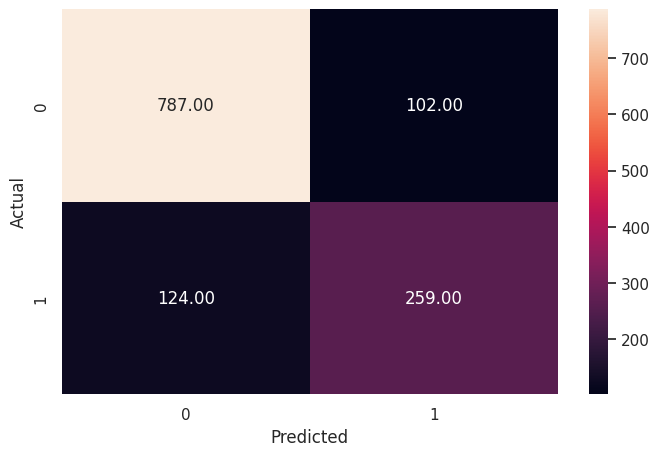

In [ ]:
print("Testing performance:")
y_pred_test_svm = model.predict(X_test_scaled)
metrics_score(y_test, y_pred_test_svm)

We find the optimal threshold below:

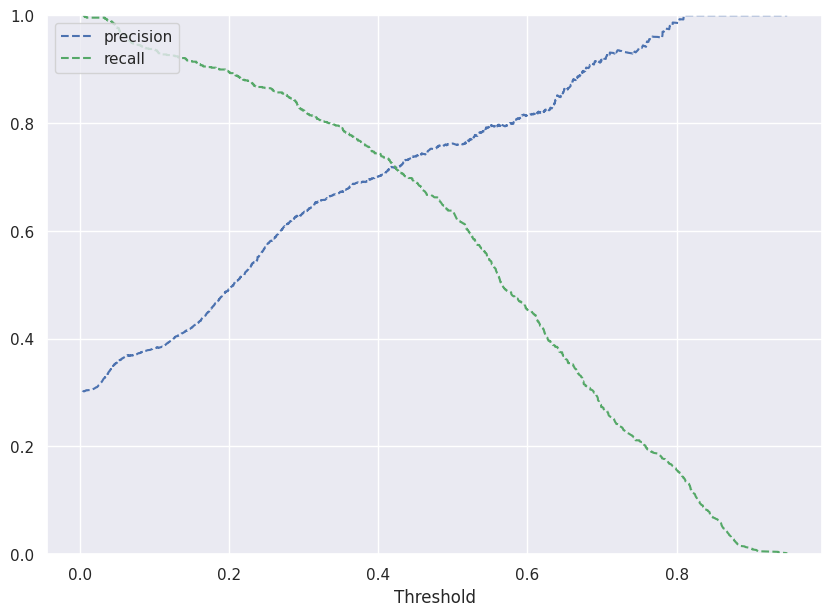

In [ ]:
# Predict on train data
y_scores_svm=model.predict_proba(X_train_scaled)

precisions_svm, recalls_svm, thresholds_svm = precision_recall_curve(y_train, y_scores_svm[:,1])

# Plot values of precisions, recalls, and thresholds
plt.figure(figsize=(10,7))
plt.plot(thresholds_svm, precisions_svm[:-1], 'b--', label='precision')
plt.plot(thresholds_svm, recalls_svm[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

Above we can see that a good optimal threshold is 0.4.

In [ ]:
optimal_threshold_svm=0.4

Check the performance using the optimal threshold.

Training performance:
              precision    recall  f1-score   support

           0       0.89      0.86      0.87      2072
           1       0.70      0.74      0.72       894

    accuracy                           0.83      2966
   macro avg       0.79      0.80      0.80      2966
weighted avg       0.83      0.83      0.83      2966



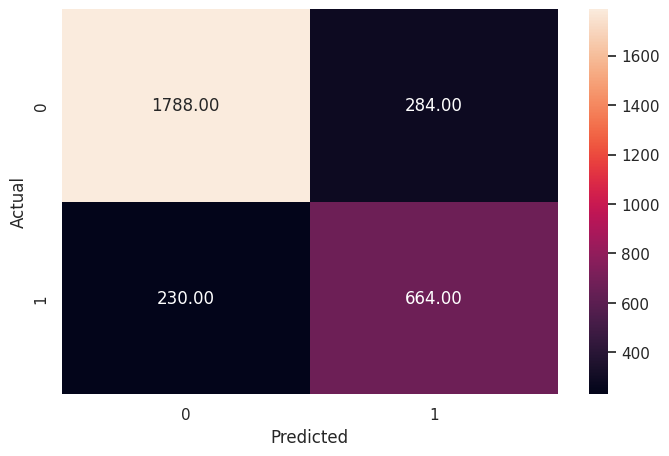

In [ ]:
print("Training performance:")
y_pred_train_svm = model.predict_proba(X_train_scaled)
metrics_score(y_train, y_pred_train_svm[:,1]>optimal_threshold_svm)

              precision    recall  f1-score   support

           0       0.88      0.86      0.87       889
           1       0.69      0.72      0.70       383

    accuracy                           0.82      1272
   macro avg       0.78      0.79      0.79      1272
weighted avg       0.82      0.82      0.82      1272



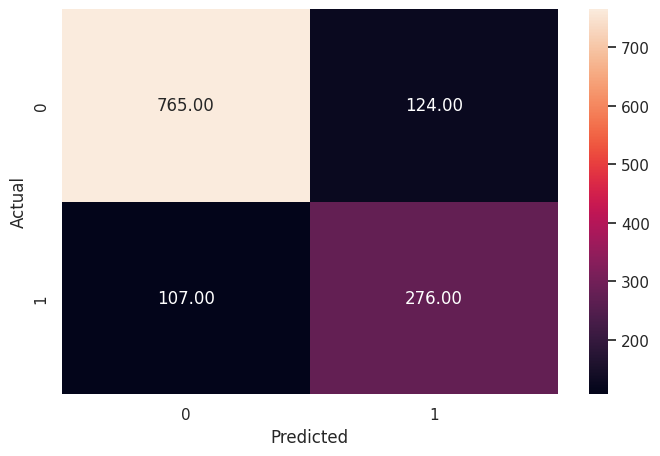

In [ ]:
y_pred_test = model.predict_proba(X_test_scaled)
metrics_score(y_test, y_pred_test[:,1]>optimal_threshold_svm)

The recall has improved.

We use the RBF kernel below:

In [ ]:
svm_rbf=SVC(kernel='rbf',probability=True)
# Fit the model
svm_rbf.fit(X_train_scaled,y_train)

SVC(probability=True)

We check the perdormance of the model on the test and train data:

              precision    recall  f1-score   support

           0       0.89      0.91      0.90      2072
           1       0.79      0.73      0.76       894

    accuracy                           0.86      2966
   macro avg       0.84      0.82      0.83      2966
weighted avg       0.86      0.86      0.86      2966



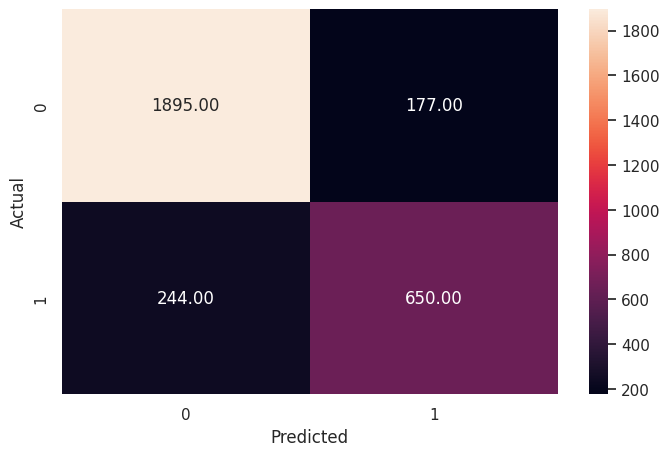

In [ ]:
y_pred_train_svm = svm_rbf.predict(X_train_scaled)
metrics_score(y_train, y_pred_train_svm)

              precision    recall  f1-score   support

           0       0.87      0.90      0.88       889
           1       0.75      0.68      0.71       383

    accuracy                           0.83      1272
   macro avg       0.81      0.79      0.80      1272
weighted avg       0.83      0.83      0.83      1272



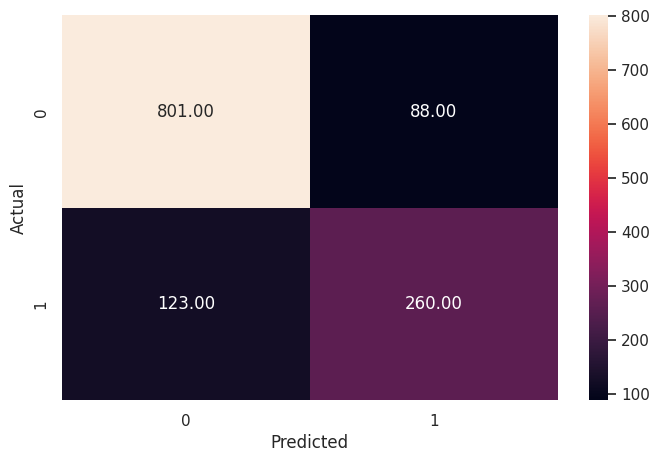

In [ ]:
y_pred_test = svm_rbf.predict(X_test_scaled)

metrics_score(y_test, y_pred_test)

We check for the optimal threshold:

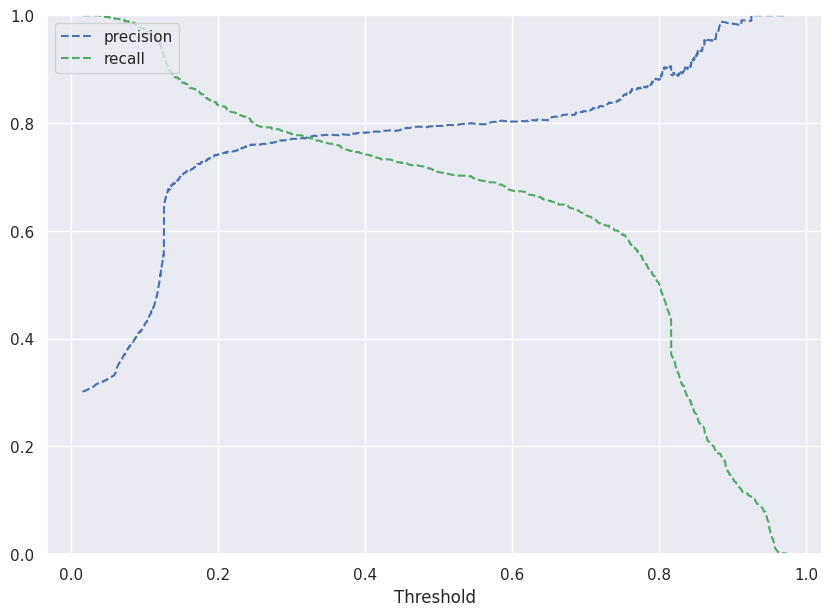

In [ ]:
# Predict on train data
y_scores_svm=svm_rbf.predict_proba(X_train_scaled)

precisions_svm, recalls_svm, thresholds_svm = precision_recall_curve(y_train, y_scores_svm[:,1])

# Plot values of precisions, recalls, and thresholds
plt.figure(figsize=(10,7))
plt.plot(thresholds_svm, precisions_svm[:-1], 'b--', label='precision')
plt.plot(thresholds_svm, recalls_svm[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

In [ ]:
optimal_threshold_svm=0.3

We check the performance on test and train data using optimal threshold:

              precision    recall  f1-score   support

           0       0.91      0.79      0.85      2072
           1       0.63      0.82      0.72       894

    accuracy                           0.80      2966
   macro avg       0.77      0.81      0.78      2966
weighted avg       0.83      0.80      0.81      2966



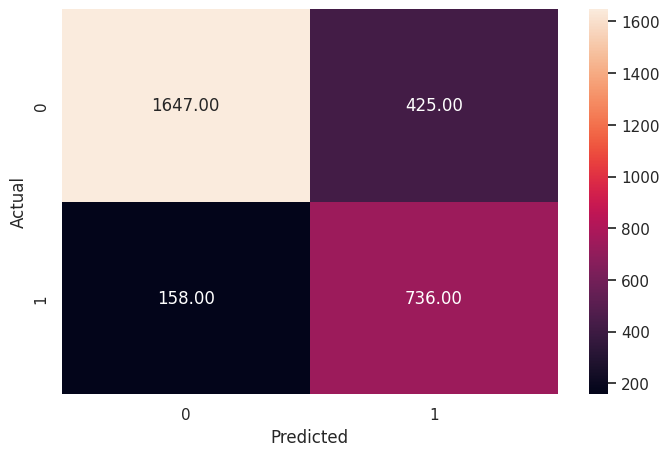

In [ ]:
y_pred_train_svm = model.predict_proba(X_train_scaled)
metrics_score(y_train, y_pred_train_svm[:,1]>optimal_threshold_svm)

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       889
           1       0.73      0.73      0.73       383

    accuracy                           0.83      1272
   macro avg       0.80      0.80      0.80      1272
weighted avg       0.83      0.83      0.83      1272



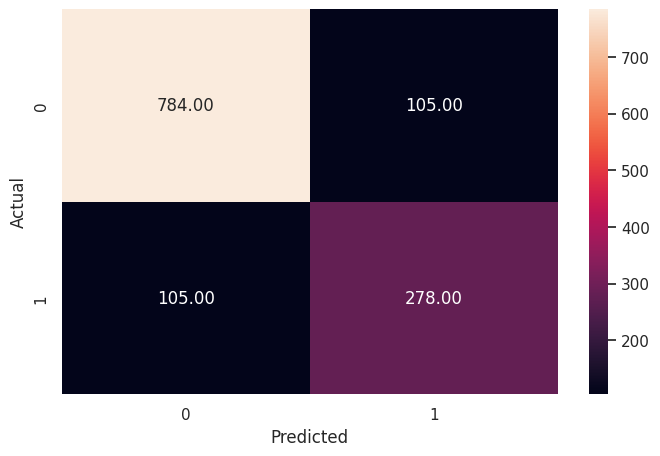

In [ ]:
y_pred_test = svm_rbf.predict_proba(X_test_scaled)
metrics_score(y_test, y_pred_test[:,1]>optimal_threshold_svm)

## EDA

- It is a good idea to explore the data once again after manipulating it.

## Building a Decision Tree model

We build our decision tree model below:

In [ ]:
model_dt = DecisionTreeClassifier(random_state=1)
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

We check the performance on the train and test data:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2072
           1       1.00      1.00      1.00       894

    accuracy                           1.00      2966
   macro avg       1.00      1.00      1.00      2966
weighted avg       1.00      1.00      1.00      2966



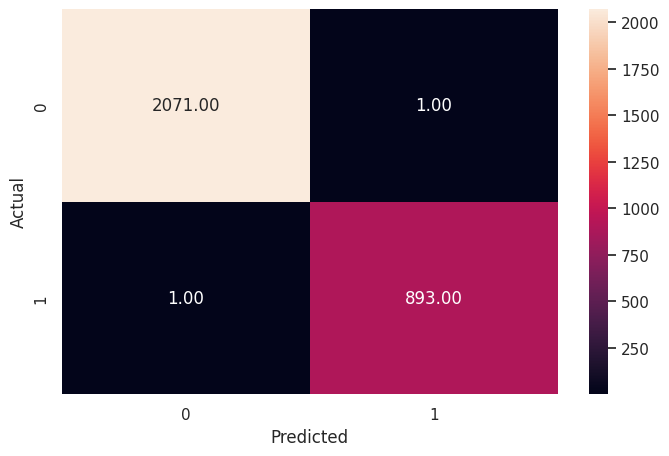

In [ ]:
#Checking performance on the training dataset
pred_train_dt = model_dt.predict(X_train)
metrics_score(y_train, pred_train_dt)

Almost 0 errors on the training data. We should be suspicious of overfitting - let's check the test data:

              precision    recall  f1-score   support

           0       0.86      0.84      0.85       889
           1       0.65      0.67      0.66       383

    accuracy                           0.79      1272
   macro avg       0.75      0.76      0.76      1272
weighted avg       0.79      0.79      0.79      1272



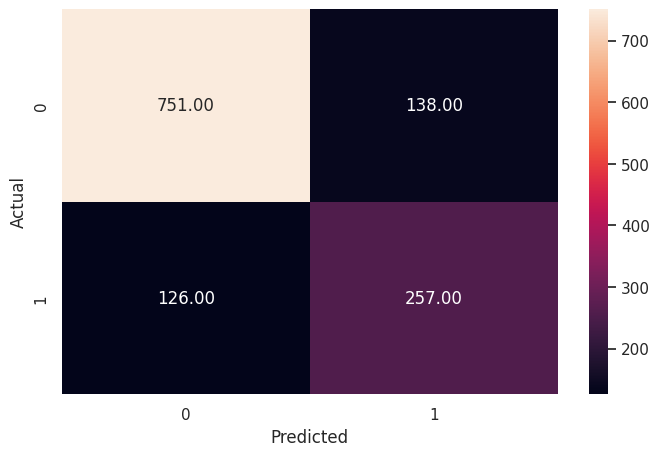

In [ ]:
pred_test_dt = model_dt.predict(X_test)
metrics_score(y_test, pred_test_dt)

So clearly it is overfitting but we will now perform hyperparameter tuning below using gridsearch CV.

In [ ]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(1,100,10),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}
# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, cv=5,scoring='recall',n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=np.int64(11), max_leaf_nodes=50,
                       min_samples_split=30, random_state=1)

We will now check the performance on the test and train data after tuning:

              precision    recall  f1-score   support

           0       0.92      0.93      0.92      2072
           1       0.83      0.80      0.81       894

    accuracy                           0.89      2966
   macro avg       0.87      0.87      0.87      2966
weighted avg       0.89      0.89      0.89      2966



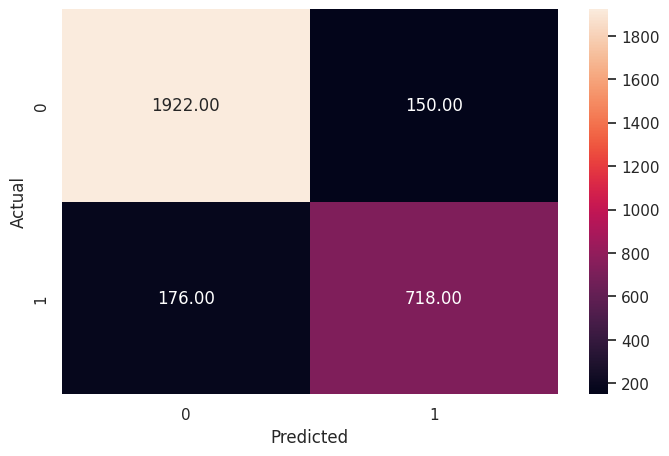

In [ ]:
# Checking performance on the training dataset
dt_tuned = estimator.predict(X_train)
metrics_score(y_train,dt_tuned)

              precision    recall  f1-score   support

           0       0.87      0.89      0.88       889
           1       0.74      0.69      0.71       383

    accuracy                           0.83      1272
   macro avg       0.80      0.79      0.80      1272
weighted avg       0.83      0.83      0.83      1272



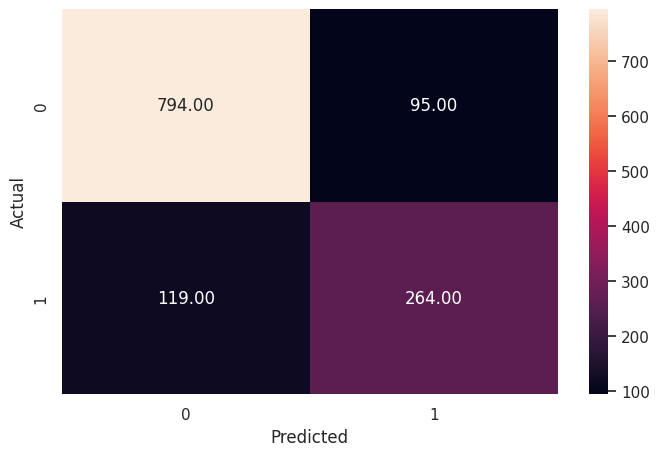

In [ ]:
# Checking performance on the training dataset
y_pred_tuned = estimator.predict(X_test)
metrics_score(y_test,y_pred_tuned)

Tuning has worked and now the model does better.

We visualize the decision tree below:

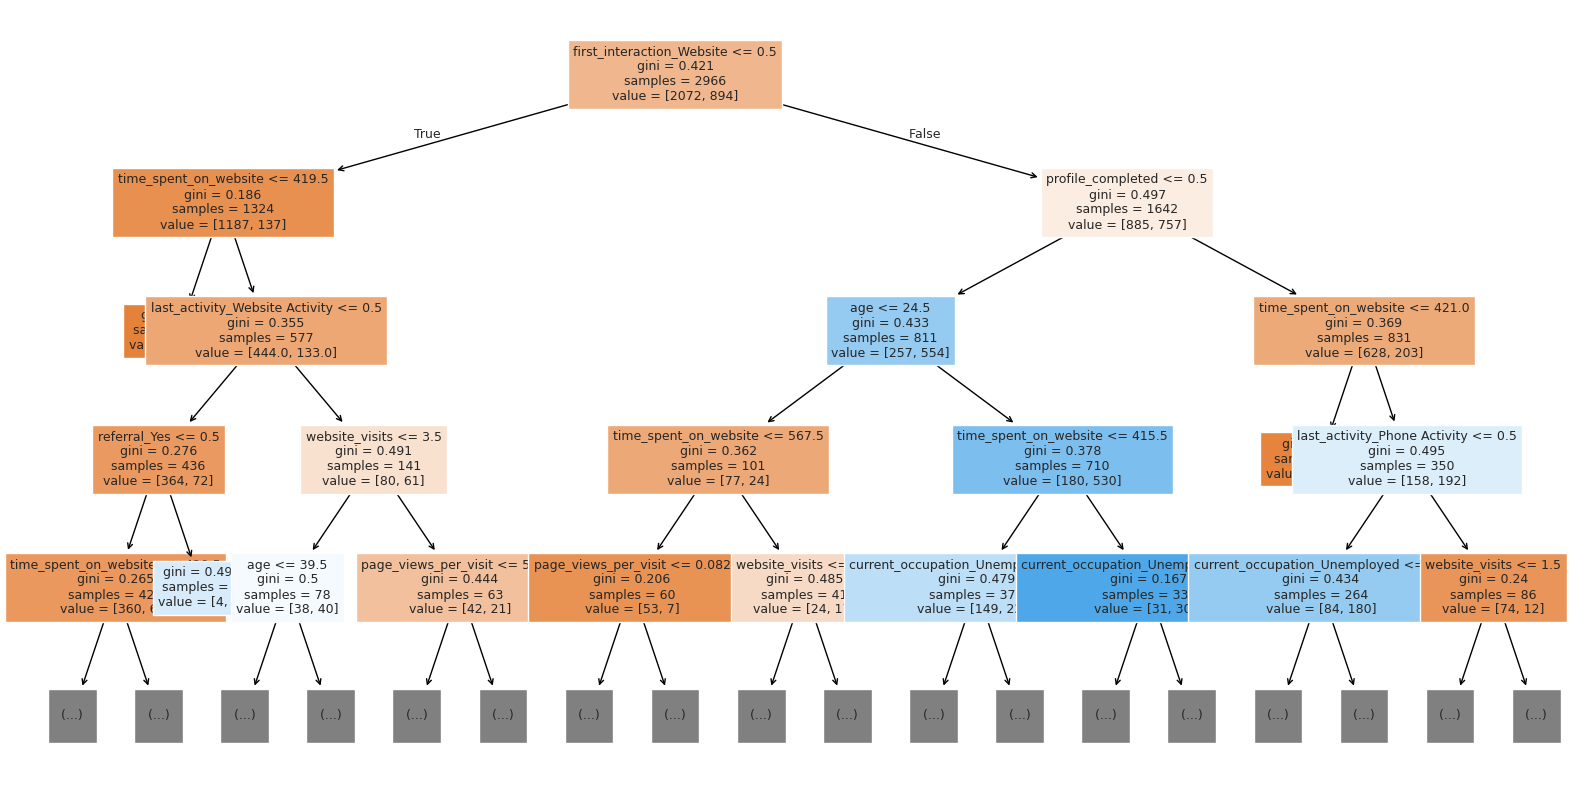

In [ ]:
feature_names = list(X_train.columns)
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    max_depth=4,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

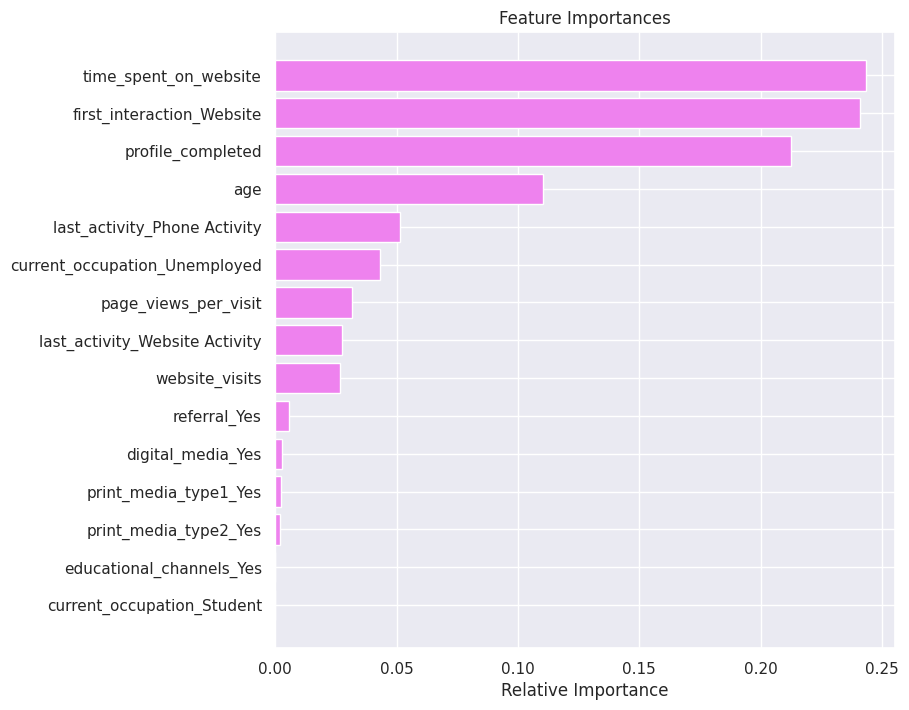

In [ ]:
# Importance of features in the tree building
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

we can see the most important features are "time spent on website", "first interaction" and "profile completed"

## Do we need to prune the tree?

No. We can do tuning as we did above.

## Building a Random Forest model

In [ ]:
rf_estimator = RandomForestClassifier( random_state = 1)

rf_estimator.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2072
           1       1.00      1.00      1.00       894

    accuracy                           1.00      2966
   macro avg       1.00      1.00      1.00      2966
weighted avg       1.00      1.00      1.00      2966



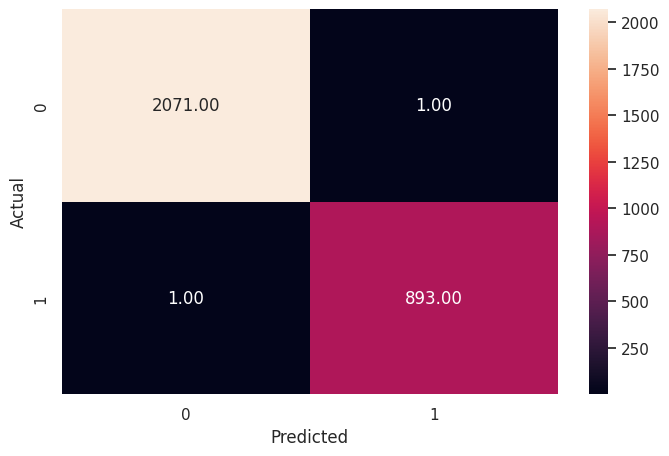

In [ ]:
y_pred_train_rf = rf_estimator.predict(X_train)

metrics_score(y_train, y_pred_train_rf)

              precision    recall  f1-score   support

           0       0.87      0.92      0.90       889
           1       0.79      0.69      0.74       383

    accuracy                           0.85      1272
   macro avg       0.83      0.81      0.82      1272
weighted avg       0.85      0.85      0.85      1272



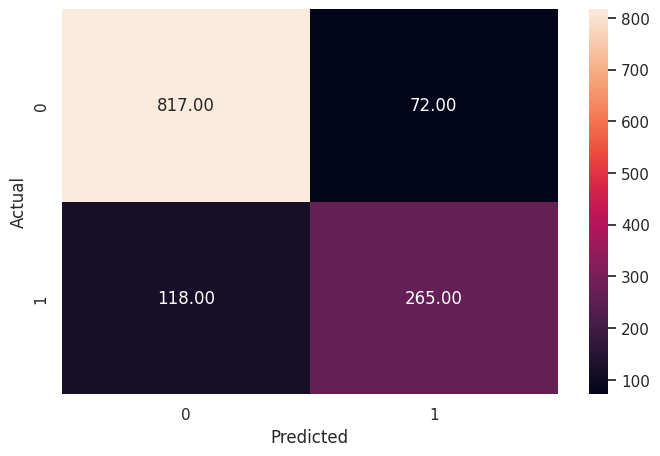

In [ ]:
y_pred_test_rf = rf_estimator.predict(X_test)

metrics_score(y_test, y_pred_test_rf)

<Axes: title={'center': 'Feature Importances'}, xlabel='Importance', ylabel='None'>

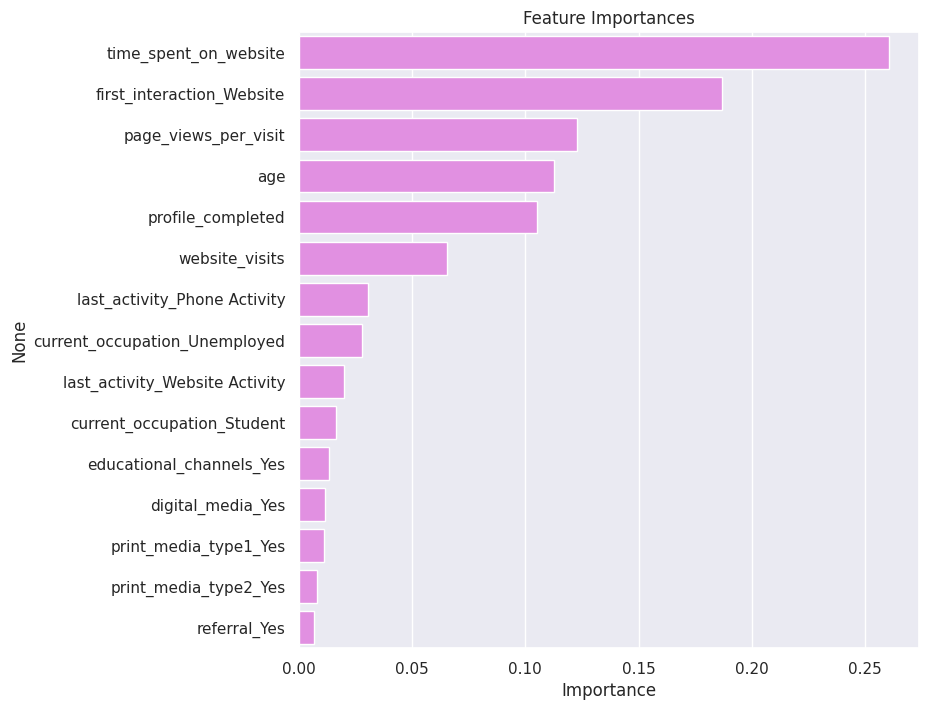

In [ ]:
importances = rf_estimator.feature_importances_

columns = X_train.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)


plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
sns.barplot(x = importance_df.Importance, y = importance_df.index, color="violet")

## Actionable Insights and Recommendations

Look at time spent on the webste, their first interaction, how much of their profile they have completed, and their age with the leads - we also highlighted a lot of the actionable insights and reccomendations throughout this doc.